In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import datetime as dt
from datetime import datetime, timedelta

# Reflect Tables into SQLAlchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy.orm import sessionmaker
from sqlalchemy import create_engine, func

In [4]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [5]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [6]:
# View all of the classes that automap found
Classes = Base.classes

# Print the class names
for Class_name in Classes.keys():
    print(Class_name)

measurement
station


In [7]:
# Save references to each table
Station = Base.classes.station
Measurement = Base.classes.measurement

In [8]:
# Create our session (link) from Python to the DB
Session = sessionmaker(bind=engine)
session = Session()

# Exploratory Precipitation Analysis

In [9]:
# Find the most recent date in the data set.
Most_Recent_Date = session.query(func.max(Measurement.date)).scalar()
print(f"{(Most_Recent_Date)}")

2017-08-23


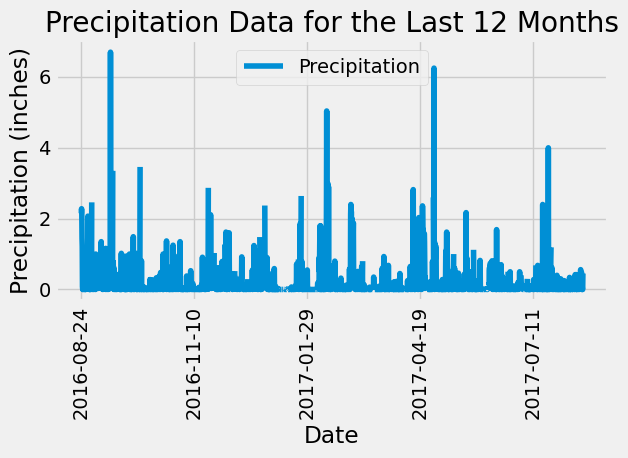

In [10]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 
latest_date = session.query(func.max(Measurement.date)).scalar()
one_year_ago = datetime.strptime(latest_date, "%Y-%m-%d") - timedelta(days=365)
# Calculate the date one year from the last date in data set.
results = session.query(Measurement.date, Measurement.prcp).\
    filter(Measurement.date >= one_year_ago).all()

# Perform a query to retrieve the data and precipitation scores
df = pd.DataFrame(results, columns=["Date", "Precipitation"])

# Save the query results as a Pandas DataFrame. Explicitly set the column names
df = pd.DataFrame(results, columns=["Date", "Precipitation"])

# Sort the dataframe by date
df = df.sort_values("Date")

# Use Pandas Plotting with Matplotlib to plot the data
df.plot(x="Date", y="Precipitation", rot=90)
plt.xlabel("Date")
plt.ylabel("Precipitation (inches)")
plt.title("Precipitation Data for the Last 12 Months")
plt.tight_layout()
plt.show()

In [11]:
# Use Pandas to calculate the summary statistics for the precipitation data
summary_statistics = df.describe()
summary_statistics

,Precipitation
count,2015.000000
mean,0.176462
std,0.460288
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [12]:
# Design a query to calculate the total number of stations in the dataset
total_stations = session.query(func.count(Station.station)).scalar()
print(f'{total_stations}')

9


In [13]:
# Design a query to find the most active stations (i.e. which stations have the most rows?)
# List the stations and their counts in descending order.
active_stations = session.query(Measurement.station, func.count(Measurement.station)).\
    group_by(Measurement.station).\
    order_by(func.count(Measurement.station).desc()).all()

for station, obs_count in active_stations:
    print(f"Station: {station}, Observations: {obs_count}")

Station: USC00519281, Observations: 2772
Station: USC00519397, Observations: 2724
Station: USC00513117, Observations: 2709
Station: USC00519523, Observations: 2669
Station: USC00516128, Observations: 2612
Station: USC00514830, Observations: 2202
Station: USC00511918, Observations: 1979
Station: USC00517948, Observations: 1372
Station: USC00518838, Observations: 511


In [14]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
most_active_station = active_stations[0][0]
temperature_stats = session.query(func.min(Measurement.tobs), func.max(Measurement.tobs), func.avg(Measurement.tobs)).\
    filter(Measurement.station == most_active_station).first()

lowest_temp = temperature_stats[0]
highest_temp = temperature_stats[1]
average_temp = temperature_stats[2]

print(f"Most Active Station: {most_active_station}")
print(f"Lowest Temperature: {lowest_temp}")
print(f"Highest Temperature: {highest_temp}")
print(f"Average Temperature: {average_temp}")


Most Active Station: USC00519281
Lowest Temperature: 54.0
Highest Temperature: 85.0
Average Temperature: 71.66378066378067


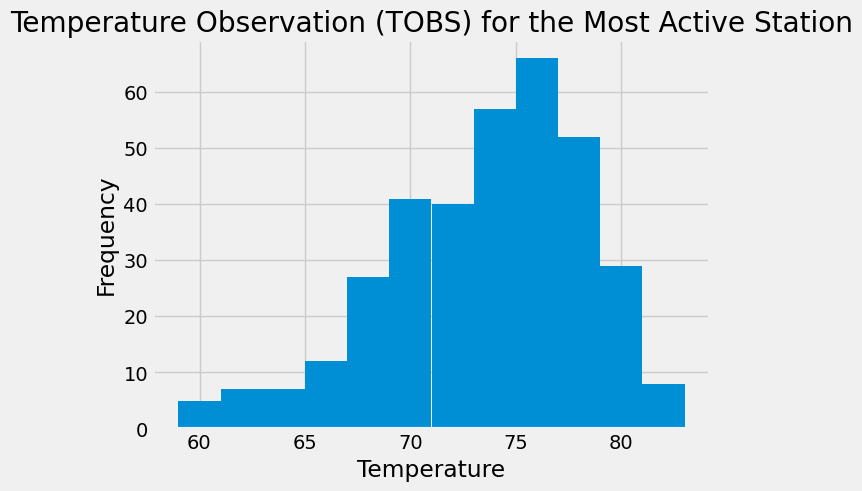

In [15]:
# Get the most active station
most_active_station = session.query(Measurement.station, func.count(Measurement.station).label('count')) \
    .group_by(Measurement.station) \
    .order_by(func.count(Measurement.station).desc()) \
    .first()

# Query the last 12 months of temperature observation data for the most active station
results = session.query(Measurement.date, Measurement.tobs) \
    .filter(Measurement.station == most_active_station.station) \
    .filter(Measurement.date >= one_year_ago) \
    .all()

# Save the query results as a Pandas DataFrame
df = pd.DataFrame(results, columns=['Date', 'Temperature'])

# Plot the temperature histogram
plt.hist(df["Temperature"], bins=12)
plt.xlabel("Temperature")
plt.ylabel("Frequency")
plt.title("Temperature Observation (TOBS) for the Most Active Station")
plt.show()


# Close Session

In [16]:
# Close Session
session.close()